# Import

In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Friends.txt','r',encoding='utf-8')

In [3]:
data = f.read()
print(data)

20/12/20, 21:38 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
20/12/20, 21:38 - You created group "Study"
20/12/20, 21:38 - You removed Swati
04/01/21, 12:13 - You changed the subject from "Study" to "M3"
04/01/21, 12:56 - Kaustubh Kabra: <Media omitted>
04/01/21, 13:00 - You changed this group's icon
05/01/21, 12:39 - Kaustubh Kabra: <Media omitted>
05/01/21, 12:57 - Kaustubh Kabra: <Media omitted>
05/01/21, 13:07 - Kaustubh Kabra: <Media omitted>
05/01/21, 13:24 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:18 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:19 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:20 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:21 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:22 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:23 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:23 - Kaustubh Kabra: <Media omitted>
11/01/21, 09:24 - Kaustubh Kabra: <Media omitted>
1

In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [5]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'You created group "Study"\n',
 'You removed Swati\n',
 'You changed the subject from "Study" to "M3"\n',
 'Kaustubh Kabra: <Media omitted>\n',
 "You changed this group's icon\n",
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: <Media omitted>\n',
 'Kaustubh Kabra: https://cloudcommunitydays.in/\n',
 'Kaustubh K

In [6]:
dates = re.findall(pattern, data)
dates

['20/12/20, 21:38 - ',
 '20/12/20, 21:38 - ',
 '20/12/20, 21:38 - ',
 '04/01/21, 12:13 - ',
 '04/01/21, 12:56 - ',
 '04/01/21, 13:00 - ',
 '05/01/21, 12:39 - ',
 '05/01/21, 12:57 - ',
 '05/01/21, 13:07 - ',
 '05/01/21, 13:24 - ',
 '11/01/21, 09:18 - ',
 '11/01/21, 09:19 - ',
 '11/01/21, 09:20 - ',
 '11/01/21, 09:21 - ',
 '11/01/21, 09:22 - ',
 '11/01/21, 09:23 - ',
 '11/01/21, 09:23 - ',
 '11/01/21, 09:24 - ',
 '11/01/21, 13:18 - ',
 '13/01/21, 13:03 - ',
 '13/01/21, 13:26 - ',
 '20/01/21, 13:00 - ',
 '20/01/21, 15:35 - ',
 '20/01/21, 15:58 - ',
 '20/01/21, 16:21 - ',
 '25/01/21, 13:03 - ',
 '30/01/21, 00:36 - ',
 '30/01/21, 00:36 - ',
 '30/01/21, 21:59 - ',
 '30/01/21, 22:12 - ',
 '30/01/21, 22:15 - ',
 '30/01/21, 22:16 - ',
 '30/01/21, 22:23 - ',
 '30/01/21, 22:28 - ',
 '30/01/21, 22:28 - ',
 '30/01/21, 23:19 - ',
 '30/01/21, 23:24 - ',
 '30/01/21, 23:30 - ',
 '01/02/21, 09:08 - ',
 '02/02/21, 13:20 - ',
 '02/02/21, 13:26 - ',
 '02/02/21, 20:02 - ',
 '03/02/21, 09:03 - ',
 '03/02/21,

In [7]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2020-12-20 21:38:00
1,"You created group ""Study""\n",2020-12-20 21:38:00
2,You removed Swati\n,2020-12-20 21:38:00
3,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04 12:13:00
4,Kaustubh Kabra: <Media omitted>\n,2021-01-04 12:56:00


In [8]:
df.shape

(17190, 2)

In [9]:
users = []
messages = []
for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if  entry[1:]:  # user name
            users.append(entry[1:])
            messages.append(entry[2])
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [10]:
df['only_date'] = df['date'].dt.date
df.head()

,date,user,message,only_date
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04


In [11]:
df['year'] = df['date'].dt.year
df.head()

,date,user,message,only_date,year
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021


In [12]:
df['month_num'] = df['date'].dt.month
df.head()

,date,user,message,only_date,year,month_num
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1


In [13]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,only_date,year,month_num,month
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January


In [14]:
df['day'] = df['date'].dt.day
df.head()

,date,user,message,only_date,year,month_num,month,day
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December,20
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December,20
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December,20
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January,4
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January,4


In [15]:
df['day_name'] = df['date'].dt.day_name()
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December,20,Sunday
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December,20,Sunday
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December,20,Sunday
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January,4,Monday
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January,4,Monday


In [16]:
df['hour'] = df['date'].dt.hour
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December,20,Sunday,21
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December,20,Sunday,21
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December,20,Sunday,21
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January,4,Monday,12
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January,4,Monday,12


In [17]:
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December,20,Sunday,21,38
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December,20,Sunday,21,38
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December,20,Sunday,21,38
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January,4,Monday,12,13
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January,4,Monday,12,56


In [18]:
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2020-12-20 21:38:00,group_notification,Messages and calls are end-to-end encrypted. N...,2020-12-20,2020,12,December,20,Sunday,21,38
1,2020-12-20 21:38:00,group_notification,"You created group ""Study""\n",2020-12-20,2020,12,December,20,Sunday,21,38
2,2020-12-20 21:38:00,group_notification,You removed Swati\n,2020-12-20,2020,12,December,20,Sunday,21,38
3,2021-01-04 12:13:00,group_notification,"You changed the subject from ""Study"" to ""M3""\n",2021-01-04,2021,1,January,4,Monday,12,13
4,2021-01-04 12:56:00,"[Kaustubh Kabra, <Media omitted>\n]",<Media omitted>\n,2021-01-04,2021,1,January,4,Monday,12,56


In [19]:
def fetch_stats(selected_user,df):

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    # fetch the number of messages
    num_messages = df.shape[0]

    # fetch the total number of words
    words = []
    for message in df['message']:
        words.extend(message.split())

    # fetch number of media messages
    num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

    # fetch number of links shared
    links = []
    for message in df['message']:
        links.extend(extract.find_urls(message))

    return num_messages,len(words),num_media_messages,len(links)

In [20]:
df[df['user'] == 'Kaustubh Kabra']

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute


In [21]:
df[df['user'] == 'Kaustubh Kabra'].shape

(0, 11)

In [22]:
def most_busy_users(df):
    x = df['user'].value_counts().head()
    df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})
    return x,df


In [23]:
df['user'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Kaustubh Kabra, <Media omitted>\n]                                           425
[Akash, <Media omitted>\n]                                                    376
[Onasvee Banarse, <Media omitted>\n]                                          322
[Onasvee Banarse, 😂😂\n]                                                       269
[Onasvee Banarse, 😂😂😂\n]                                                      209
                                                                             ... 
[Kaustubh Kabra, Kya pagal ladki he re baba ye\n]                               1
[Onasvee Banarse, I am in computers department\n]                               1
[Akash, 16th wala mila kya\n]                                                   1
[Onasvee Banarse, why i feel this paper was arranged 10 min before exam\n]      1
[Kaustubh Kabra, I am not coming that's for sure 😅😂😂😂\n]                        1
Name: user, Length: 11192, dtype: int64

In [24]:
df['user'].value_counts().head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Kaustubh Kabra, <Media omitted>\n]     425
[Akash, <Media omitted>\n]              376
[Onasvee Banarse, <Media omitted>\n]    322
[Onasvee Banarse, 😂😂\n]                 269
[Onasvee Banarse, 😂😂😂\n]                209
Name: user, dtype: int64

In [25]:
import matplotlib.pyplot as plt

In [26]:
x = df['user'].value_counts()
name = x.index
count = x.values


In [27]:
(df['user'].value_counts()/df.shape[0])*100

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Kaustubh Kabra, <Media omitted>\n]                                           2.472368
[Akash, <Media omitted>\n]                                                    2.187318
[Onasvee Banarse, <Media omitted>\n]                                          1.873182
[Onasvee Banarse, 😂😂\n]                                                       1.564863
[Onasvee Banarse, 😂😂😂\n]                                                      1.215823
                                                                                ...   
[Kaustubh Kabra, Kya pagal ladki he re baba ye\n]                             0.005817
[Onasvee Banarse, I am in computers department\n]                             0.005817
[Akash, 16th wala mila kya\n]                                                 0.005817
[Onasvee Banarse, why i feel this paper was arranged 10 min before exam\n]    0.005817
[Kaustubh Kabra, I am not coming that's for sure 😅😂😂😂\n]                      0.005817
Name: user, Length: 11192, dtype: float64

In [28]:
round((df['user'].value_counts()/df.shape[0])*100,2)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Kaustubh Kabra, <Media omitted>\n]                                           2.47
[Akash, <Media omitted>\n]                                                    2.19
[Onasvee Banarse, <Media omitted>\n]                                          1.87
[Onasvee Banarse, 😂😂\n]                                                       1.56
[Onasvee Banarse, 😂😂😂\n]                                                      1.22
                                                                              ... 
[Kaustubh Kabra, Kya pagal ladki he re baba ye\n]                             0.01
[Onasvee Banarse, I am in computers department\n]                             0.01
[Akash, 16th wala mila kya\n]                                                 0.01
[Onasvee Banarse, why i feel this paper was arranged 10 min before exam\n]    0.01
[Kaustubh Kabra, I am not coming that's for sure 😅😂😂😂\n]                      0.01
Name: user, Length: 11192, dtype: float64

In [29]:
df['month_num'] = df['date'].dt.month

In [30]:
df.groupby(['year','month_num']).count()['message']

year  month_num
2020  12              3
2021  1              35
      2              44
      3             596
      4            1101
      5            2586
      6            2753
      7             761
      8            1997
      9            2103
      10           1502
      11           1423
      12           2286
Name: message, dtype: int64

In [31]:
df.groupby(['year','month_num']).count()['message'].reset_index()

,year,month_num,message
0,2020,12,3
1,2021,1,35
2,2021,2,44
3,2021,3,596
4,2021,4,1101
5,2021,5,2586
6,2021,6,2753
7,2021,7,761
8,2021,8,1997
9,2021,9,2103


In [32]:
timeline = df.groupby(['year','month_num']).count()['message'].reset_index()

In [33]:
timeline

,year,month_num,message
0,2020,12,3
1,2021,1,35
2,2021,2,44
3,2021,3,596
4,2021,4,1101
5,2021,5,2586
6,2021,6,2753
7,2021,7,761
8,2021,8,1997
9,2021,9,2103


In [34]:
df['only_date'] = df['date'].dt.date

In [35]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

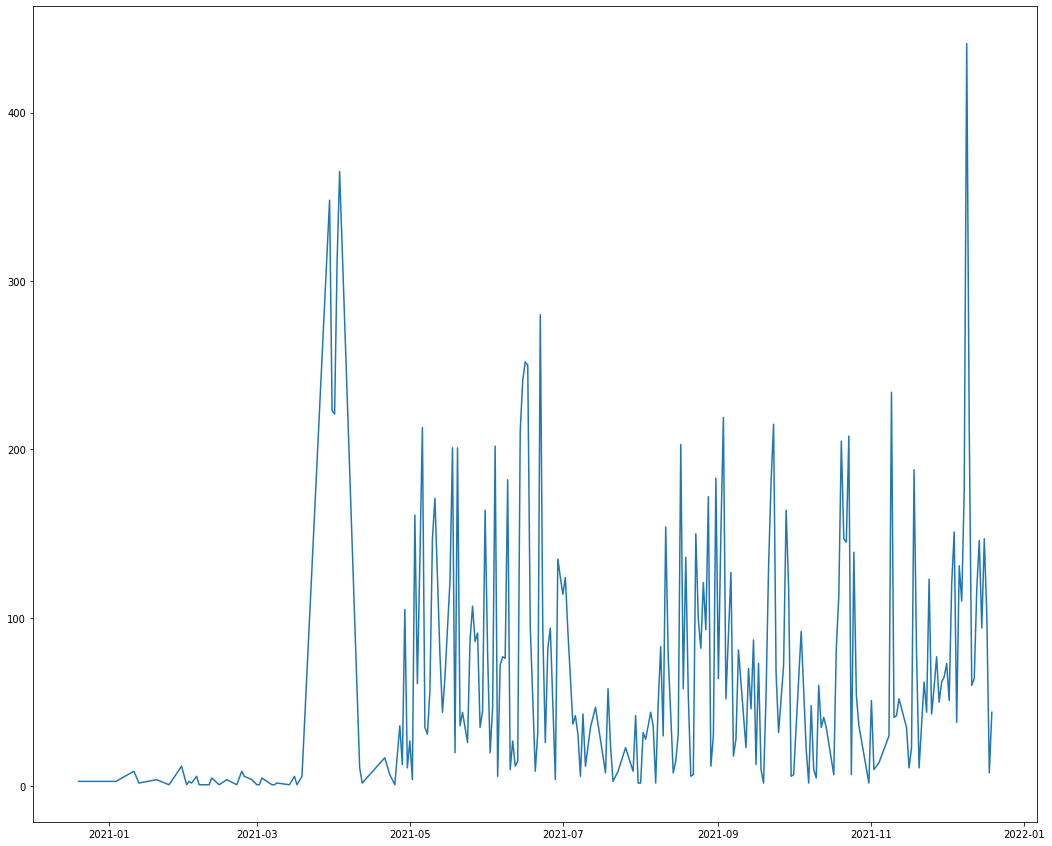

In [36]:
plt.figure(figsize=(18,15))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [37]:
df['day_name'] = df['date'].dt.day_name()

In [38]:
df['day_name'].value_counts()

Tuesday      3529
Thursday     3325
Wednesday    2897
Monday       2625
Friday       2556
Saturday     1609
Sunday        649
Name: day_name, dtype: int64